# Logistic Regression

Logistic regression is also referred to as logit regression. 
It is a regression model where the **dependent variable is categorical and binary**, where it can take only two values, such as pass/fail, win/lose, healthy/sick etc. 
Dependent variables with more than two categories are referred to as multinomial logistic regression.

Logistic regression is a special case of the generalized linear model and is analogous to linear regression. 
It has the following assumptions between dependent ($y$) and independent variables($x_1,x_2,..,x_n$). 

* The conditional distribution $y\ |\ x$ is a Bernoulli distribution rather than a Gaussian distribution for linear regression, because the dependent variable is binary. 

* The predicted values are restricted to (0,1) because logistic regression predicts the probability of particular outcomes.


### The Data


The predictors can be continuous or categorical or a mix of both types. 
We will work with framingham dataset in this notebook. 
In this dataset we will be predicting the 10 year coronary heart disease (CHD). 
The dependent variable is modeled as the binary variable where 1 represents the presence risk of CHD and 0 represents the absence of risk of CHD in 10 years. 

Logistic regression predicts the probability of the outcome variable being TRUE (1).
    

When predicting the disease, we want to know the variables which are risk factors which increase the chance of disease. 
Some of the risk factors in the dataset include demographic information like male, age, education(school-1, high school/GED -2, some college/vocational - 3, college - 4), etc. 
Behavioral factors like "current smoker" and "cigsPerDay" are also included. 
The rest of the possible predictors are all medical history risk factors. 

Let's build the model using the risk factors in the data. 
**We will predict whether or not a patient experienced CHD within 10 years of first examination.**

<a id="Logistic_Function"></a>

`TenYearCHD` is the dependent variable ($y$). We should predict $P(y=1)$. Then $P(y=0)=1-P(y=1)$. 

### Logistic Function 

The **sigmoid function** used in logistic regression outputs the conditional probabilities of the prediction, 
the class probabilities. 
It works based on "odds ratio" $\frac{p}{1 - p}$, 
which describes the ratio between the probability that a certain positive event occurs and the probability that it doesn't occur. 
Here positive refers to the "event that we want to predict" that is $p(y=1 | x)$. 
As in the image below, the more likely that the positive event occurs, 
the larger the odds ratio will be.

<img src="../images/odds.png">

Now, if we take the natural log of this odds ratio, logit function, we get the following

$$logit(\ p(y=1\ |\ x)\ ) = log\bigg(\frac{p}{1-p}\bigg) = log(p)-log(1-p) = β_0 + β_1.{x_1} + ... + β_k.{x_k}$$

We don't have to predict the right part of the equation above, 
since p(y=1|x) is what we are really interested in.
So, taking an inverse of this logit function, we get the logistic sigmoid shown below. 
We use this function to make predictions.

$$ logit^{-1}(P(y=1\ |\ x)) = \frac{1}{1+e^{-(β_0 + β_1.{x_1} + β_2.{x_2} + ... + β_k.{x_k})}}$$

The equation looks like a complicated nonlinear equation but it's the familiar linear regression equation $β_0 + β_1.{x_1} + β_2.{x_2} + ... + β_k.{x_k}$ in this logistic response function. 
This function is used to produce a number between 0 and 1. 

<img src="../images/logistic_response_function.JPG">


The plot above shows the logistic response function for different values of the linear regression piece. 
The logistic response function always takes values between 0 and 1 which makes sense because it's probability. 
A positive coefficient for the variables increases the linear regression piece $β_0 + β_1.{x_1} + β_2.{x_2} + ... + β_k.{x_k}$  which increases the probability that y=1 or the probability of risk of CHD. 
On the other hand a negative coefficient for the variables decreases the linear regression piece which in turn decreases the probability of y=1 or decreases the probability of risk of CHD. 
The coefficients, or betas, are selected to predict a high probability for the risk of CHD and to predict a low probability no risk of CHD.

Another way to think about logistic response function is in terms of odds. The odds is the probability of 1 divided by probability of 0. Odds are greater than 1 if y=1 is more likely. Odds are less than 1 if y=0 is more likely. 

$$Odds = \frac{P(y=1)}{P(y=0)}$$

Odds > 1, if y=1 is more likely

Odds < 1, if y=0 is more likely

Odds =1 , if both outcomes are equally likely.

If you substitute the logistic response function for the probabilities in the odds equation you will see that the odds are equal to e raised to the power of the linear regression equation, as shown below.

$$Odds = e^{(β_0 + β_1.{x_1} + β_2.{x_2} + ... + β_k.{x_k})}$$ 

By taking the log of both sides $log (Odds) = (β_0 + β_1.{x_1} + β_2.{x_2} + ... + β_k.{x_k})$ the log (Odds) or **logit** looks exactly like the linear regression equation. This helps us understand how coefficients affect our prediction of the probability. A positive beta value increases the **Logit** which in turn increases the odds of 1. A negative beta value decreases the **Logit** which in turn decreases the odds of 1. 

---

## Example

In [1]:
framingham_data = read.csv("/dsa/data/all_datasets/framingham/framingham.csv")
head(framingham_data)
framingham_data = framingham_data[complete.cases(framingham_data),]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
4,0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
5,0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
6,0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


In [2]:
summary(framingham_data)

      male             age          education    currentSmoker   
 Min.   :0.0000   Min.   :32.00   Min.   :1.00   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:42.00   1st Qu.:1.00   1st Qu.:0.0000  
 Median :0.0000   Median :49.00   Median :2.00   Median :0.0000  
 Mean   :0.4437   Mean   :49.55   Mean   :1.98   Mean   :0.4891  
 3rd Qu.:1.0000   3rd Qu.:56.00   3rd Qu.:3.00   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :70.00   Max.   :4.00   Max.   :1.0000  
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.025   Mean   :0.03034   Mean   :0.005741   Mean   :0.3116  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000  
    diabetes          totChol     

In [3]:
str(framingham_data)

'data.frame':	3658 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


We will use all predictors to determine if the patient developed CHD in next 10 years. 

By splitting the data into training and testing sets, we will evaluate the predictive capability of our model on the test dataset. 

TenYearCHD, is the dependent variable and is equal to 1 if the person has risk of CHD and equal to 0 if the person had no risk of CHD. Let's see how many people had risk of CHD and how many didn't by using the table function.

In [4]:
table(framingham_data$TenYearCHD)


   0    1 
3101  557 

In [5]:
3101/3658

[1] 0.847731

We can see that 557 out of the 3658 patients in the data set had risk of CHD, or 1, and 3101 patients had no risk of CHD, or those labeled with 0. 

Before building a predictive model, let's consider using a simple baseline method. In [linear_and_multiple_regression lab](Linear_and_Multiple_Regression.ipynb#R-squared), we computed the R-squared for linear regression, we compared our predictions to the baseline method of predicting the average distance to stop for all data points. 

In a classification problem, a standard baseline method is to just predict the most frequent outcome for all observations. Since no risk is more common than risk of CHD, in this case, we would predict that all of them have not shown any risk of CHD. 

**If we did this, we would get 3101 out of the 3658 observations correct, or have an accuracy of about 85%. So our baseline model has an accuracy of 85%. This is what we'll try to beat with our logistic regression model.**

### Training and Testing Sets 

Let's split the data set randomly into a training set and testing set so that we'll have a test set to measure our out-of-sample accuracy.

In [6]:
library(caTools)

In [7]:
set.seed(1000) # set.seed() will help us to reproduce the results.
split = sample.split(framingham_data$TenYearCHD, SplitRatio=0.7)

`sample.split` randomly splits the dataset based on the outcome variable while keeping the SplitRatio in mind.
**It also makes sure that the outcome variable is well-balanced in each piece.** 

We have seen that about 85% of people don't have risk of CHD. 
This function makes sure that in the training set, 85% of people don't have risk of CHD and in the testing set 85% of people don't have risk of CHD. So, the test and training sets are representatives of the data.

The `SplitRatio` tells how much percentage of data we want in the training set. 
When there are more data, we can afford to put less data in the training set and more in testing. 
This will increase our confidence on the model. 
Normally, you would want to put 50% to 80% of the data in the training set.

**Reference:** [set.seed()](http://rfunction.com/archives/62)

In [8]:
# split up the data using subset(). split==TRUE will give 70% of data as we mentioned above using SplitRatio parameter. 
train_data  = subset(framingham_data, split==TRUE)

# Test data will have the remaining 30% of data
test_data  = subset(framingham_data, split==FALSE)

Our training set is called train_data and we use the subset function to take a subset of `framingham_data` and only taking the observations for which spit is equal to TRUE. 
Our testing set is called test_data and, again, we use the subset function to take the observations of framingham_data, but this time those for which split is equal to FALSE.

We can build a logistic regression model using all the independent variables present in the dataset. 
We use the `glm` function for "generalized linear model" to build our logistic regression model. 
We start with the dependent variable, and then the tilde sign, and then the independent variables. 
Since we want to use all independent variables, 
they can be included using a dot(.) as shown in below code cell. 
We then give the name of the data set we want to use to build the model, in this case, train_data. 
For a logistic regression model, we need one last argument, which is `family=binomial`. 
This tells the glm function to build a logistic regression model. 

In [9]:
help(glm)

In [10]:
# Logistic Regression model
framingham_log = glm(TenYearCHD ~., 
                     data=train_data,family=binomial) 
                # family=binomial tell glm() to build  
                # a logistic regression model.

Let's look at the model using the summary function.

In [11]:
summary(framingham_log)


Call:
glm(formula = TenYearCHD ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9465  -0.6019  -0.4168  -0.2723   2.8342  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -8.147517   0.856122  -9.517  < 2e-16 ***
male             0.562997   0.131368   4.286 1.82e-05 ***
age              0.066380   0.007983   8.315  < 2e-16 ***
education       -0.130789   0.060676  -2.156  0.03112 *  
currentSmoker    0.031966   0.188375   0.170  0.86525    
cigsPerDay       0.019760   0.007455   2.650  0.00804 ** 
BPMeds           0.146584   0.283906   0.516  0.60564    
prevalentStroke  0.633471   0.527053   1.202  0.22940    
prevalentHyp     0.254990   0.166855   1.528  0.12646    
diabetes         0.138585   0.368311   0.376  0.70671    
totChol          0.003480   0.001325   2.626  0.00864 ** 
sysBP            0.012884   0.004570   2.819  0.00482 ** 
diaBP           -0.003368   0.007699  -0.4

In [12]:
help(family) # Run this cell if you want to learn more about family parameter. 

**Reference:**[glm()](http://www.statmethods.net/advstats/glm.html)

The output looks similar to that of a linear regression model.
What we want to focus on is the coefficients table. 
This gives the estimate values for the coefficients, or the betas, for our logistic regression model. 


According to the p-value; variables age, male, sysBP, cigsPerDay, glucose, and totChol are all significant variables in the model. 

All these variables have a positive coefficient which means higher values in these variables contribute higher risk in tenYearCHD. Some of the variables have negative coefficients. 
One more important thing to look at in the output is the AIC value. 
This is a measure of the quality of the model like Adjusted R-squared which accounts for the number of variables used compared to the number of observations.

Unfortunately, it can only be compared between models on the same data set. 
But it provides a means for model selection. 
**The preferred model is the one with the minimum AIC.** 


Now, let's make predictions in the training set. 
We'll call them predictTest and use the `predict` function to make predictions using the model framingham_log, 
and we'll give a second argument, which is type="response". 
This tells the predict function to give us probabilities as opposed to class labels (0 or 1). 

In [13]:
# Predictions on the test set
predictTest = predict(framingham_log, type="response", newdata=test_data) # Type='response' gives us probabilities.

Let's take a look at the statistical summary of our predictions.

In [14]:
summary(predictTest)
# Let's do a summary on our predictions. Since the predict function has generated probabilities as output you should see values are 
# lying between 0 and 1.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01428 0.06339 0.11932 0.15195 0.20499 0.92806 


### Confusion Matrix 

The outcome of logistic regression function is a probability. 
We want to make a binary prediction if the subject had risk of CHD or not. We can do this using a threshold value t. 

 - If P (risk of CHD = 1) >= t, predict risk of CHD

 - If P (risk of CHD = 1) < t, predict no risk of CHD

So, the question is what value should be picked for `t`. 
In this example **if t is large**, it rarely predicts risk of CHD but there is actually a risk of CHD. 
People who have the risk of CHD can go undetected; **this is called a FALSE NEGATIVE** (falsely predicting that people will not have the disease).


On the other hand, **if t is small**, more subjects are identified as risk prone of CHD, which may create more **FALSE POSITIVES** (falsely predicting that people will have the disease).


There is a tradeoff between false positives and false negatives. You may prefer to have more false positives in order to not to miss risky patients so that false negatives are small.  When you have a preference over the error, t value will have to reflect that. 

For no preference between errors, we can select `t=0.5`; it predicts the more likely outcome.  

We can decide on a threshold value t using **a confusion matrix**. 

**In a confusion matrix, rows are labelled with actual outcome and columns are labelled with predicted outcome.**


 - **True Negatives(TN)** are the observations which we predicted as no risk of CHD and there is actually no risk of CHD.
 - **True Positives(TP)** are the observations which we predicted as risk of CHD and there is actually risk of CHD.
 - **False Positives(FP)** are the observations which we predicted as risk of CHD but there is no risk of CHD.
 - **False Negatives(FN)** are the observations which we predicted as no risk of CHD but there is a risk of CHD. 

```
|        |  Predicted=0      | Predicted=1       |
|--------|-------------------|-------------------|
|Actual=0|True Negatives(TN) |False Positives(FP)|
|Actual=1|False Negatives(FN)|True Positives(TP) |
```

We can compute two outcome measures that help us determine what type of errors we are making. 
They are called [**Sensitivity** and **Specificity**](https://en.wikipedia.org/wiki/Sensitivity_and_specificity). 

$Sensitivity = \frac{TP}{TP+FN}$, 
this is often called the true positive rate, or also as **Recall**.

$Specificity = \frac{TN}{TN+FP}$, 
this is called the true negative rate. 

Positive predictive value $PPV = \frac{TP}{TP+FP}$, is also known as **Precision**. 

F-measure, also known as F1 score, combines recall and precision into one measure:
$F = 2\times \frac{precision\times recall}{precision + recall}$

A model with a higher threshold will have a lower sensitivity and a higher specificity. 
A model with a lower threshold will have a higher sensitivity and a lower specificity.

In [22]:
# Build a confusion matrix using a threshold of 0.5
table(test_data$TenYearCHD, predictTest>0.5)

   
    FALSE TRUE
  0   926    4
  1   151   16

Sensitivity = TP/(TP+FN) = 16/(16+151) = 0.095

Specificity = TN/(TN+FP) = 926/(926+4) = 99.56

With a threshold of 0.5 we predict an outcome of 1 in the true column of the above output very rarely. This means our model rarely predicts a Ten Year CHD risk above 50%. Decrease the threshold value to 0.3 and build the confusion matrix again.

In [23]:
# Build a confusion matrix using a threshold of 0.3
table(test_data$TenYearCHD, predictTest>0.3)

   
    FALSE TRUE
  0   840   90
  1   124   43

Sensitivity = 43/(124+43) = 0.257

Specificity = 840/(840+90) = 0.90

As you can see from the above results, as you decrease the threshold value, sensitivity will increase and specificity will decrease. It works opposite way if you increase the threshold value. 

Let's check the **accuracy of the model** with a threshold value of 0.5. It's the sum of the cases we predicted correctly divided by all the observations in the dataset. 

In [24]:
table(test_data$TenYearCHD, predictTest>0.5)

   
    FALSE TRUE
  0   926    4
  1   151   16

In [18]:
# (TP+TN) / number of observations in the dataset.
(16+926)/(926+4+151+16)

[1] 0.8587056

The accuracy of our model is about 86%. We need to compare this with a simple baseline model. The more frequent outcome in this method is zero so it will always predicts a zero or no CHD. The baseline model will have the accuracy  calculated below... 

In [25]:
# Numerator will have outcomes which are predicted as 0 divided by total number of observations.
(926+4)/(926+4+151+16)

[1] 0.8477666

So, the baseline model has an accuracy of 85%. Our model barely beats the baseline model, but do we have a valuable model? We still have to compute **an AUC value**.

---

### ROC Curves

**[Receiver Operating Characteristic (ROC) curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)** are a popular way to visualize the tradeoffs between sensitivitiy and specificity in a binary classifier. It is a plot of true positive rate (specificity) vs. false positive rate (1-sensitivity). 
Computing the area under this curve is one way to summarize the performance of the classifier in a single value; this metric is so common that if data scientists say "area under the curve" or "AUC", you can assume that an ROC curve is meant. 



Probably the most straightforward and intuitive metric for classifier performance is accuracy as computed above. Unfortunately, there are circumstances where simple accuracy does not work well. For example, with a disease that only affects 1 in a million people, a completely bogus screening test that always reports "negative" would be 99.9999% accurate. **Unlike accuracy, ROC curves are insensitive to class imbalance; the bogus screening test would have an AUC of 0.5**, which is like not having a test at all.

<img src="../images/Roc_curve.png">

Let's compute the AUC for our classifier:


In [26]:
library(ROCR)

[1] 0.7162514

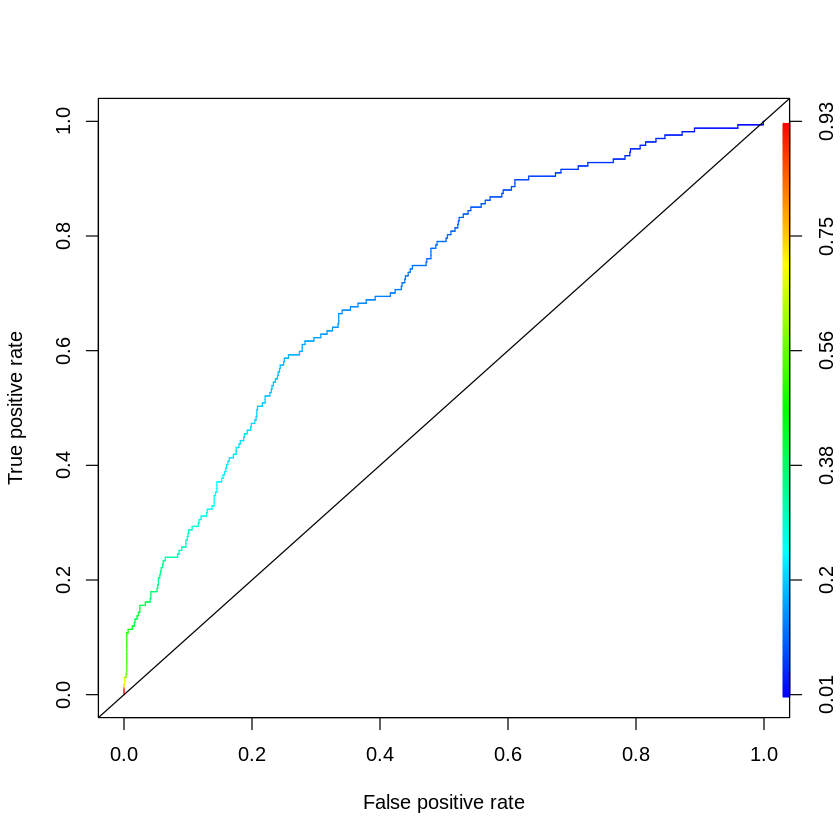

In [27]:
# Use predict function of ROCR package to make the predictions
ROCR_predictions = prediction(predictTest, test_data$TenYearCHD)

perf <- performance(ROCR_predictions,"tpr","fpr")

plot(perf,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions,"auc")@y.values)

We have an AUC of about 72% on the test set, which means the model can differentiate between low risk and high risk patients somewhat well.

Our model rarely predicted 10 year CHD risk above 50%. So, the accuracy of the model is barely over the baseline model. 
However, the model was actually able to differentiate between low risk patients and high risk patients.


# Save your notebook